<a href="https://colab.research.google.com/github/Abhyuday-Dev/Calories-burn-predictor/blob/main/Calories_burnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dependencies


In [ ]:
!pip install catboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import catboost  as cb
# import shap
# import load_boston
from sklearn import metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.8 MB/s eta 0:00:00


Data Preprocessing


In [ ]:
#Making dataframes from csv files
calories=pd.read_csv('/content/calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise=pd.read_csv('/content/exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Merging both csv files


In [ ]:
calories_data=pd.concat([exercise,calories['Calories']],axis=1)
calories_data.head()



,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
#Get number of rows and column
calories_data.shape

(15000, 9)

In [ ]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
#check if any column has empty values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Analysing Data

In [ ]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [ ]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

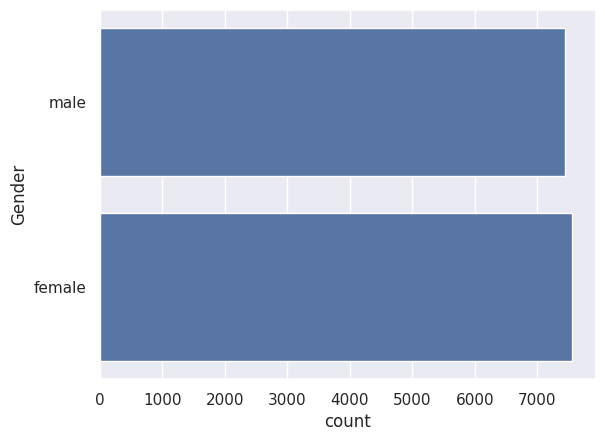

In [ ]:
#plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

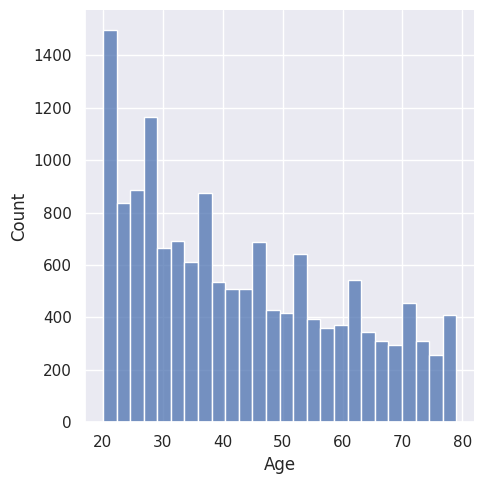

In [ ]:
#finding the distribution of "age" column
sns.displot(calories_data['Age'])

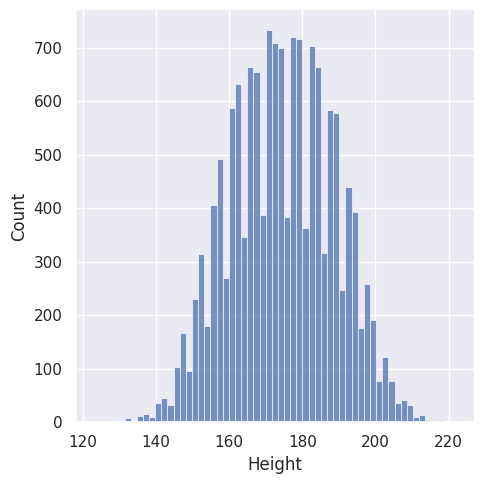

In [ ]:
#finding the distribution of "Height" column
sns.displot(calories_data['Height'])

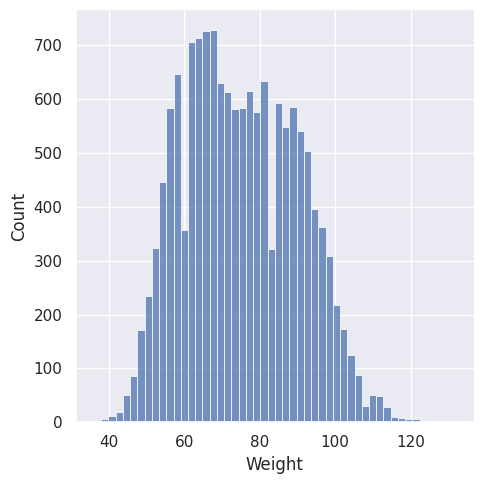

In [ ]:
sns.displot(calories_data['Weight'])

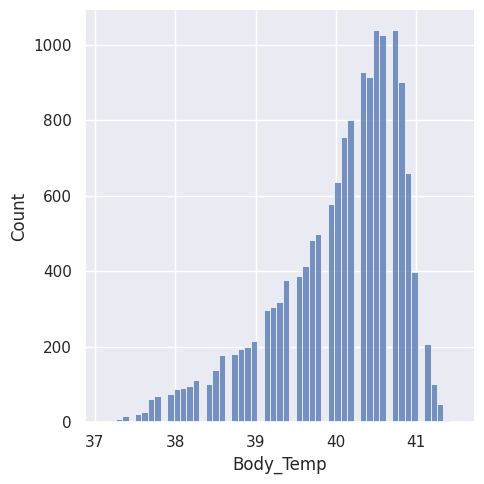

In [ ]:
sns.displot(calories_data['Body_Temp'])

Converting the test data to numerical data

In [21]:
calories_data.replace({"Gender": {'male':0, 'female':1}}, inplace=True)

Finding the correlation in the dataset

---



1.Positive correlation

2.Negative Correlation

In [22]:
correlation = calories_data.corr()

<Axes: >

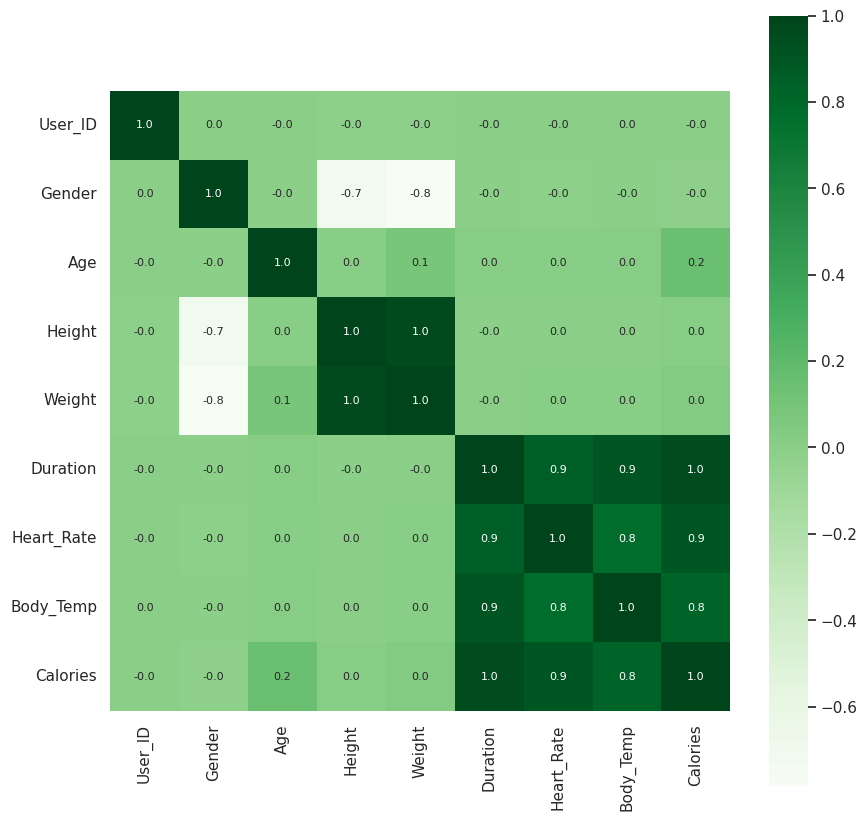

In [25]:

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

Converting the test data to numerical data

In [20]:
calories_data.replace({"Gender": {'male':0, 'female':1}}, inplace=True)

In [26]:
calories_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and target

In [27]:
X= calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y= calories_data['Calories']

In [28]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [29]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Code to split training and testing data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [43]:
#loading the model
model = XGBRegressor()

In [44]:
#training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on test data

In [45]:
test_data_prediction = model.predict(X_test)

In [46]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute error

In [47]:
 mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [49]:
print("Mean absolute error = ", mae)


Mean absolute error =  1.4833678883314132


Catboost

---



In [50]:
modelCat = cb.CatBoostRegressor(loss_function='RMSE')
modelCat.fit(X_train , Y_train)

Learning rate set to 0.06063
0:	learn: 59.0633191	total: 50.6ms	remaining: 50.5s
1:	learn: 55.8781450	total: 52.8ms	remaining: 26.3s
2:	learn: 52.8127867	total: 55.4ms	remaining: 18.4s
3:	learn: 49.9519531	total: 58.1ms	remaining: 14.5s
4:	learn: 47.3023222	total: 60.6ms	remaining: 12.1s
5:	learn: 44.7787389	total: 64.6ms	remaining: 10.7s
6:	learn: 42.4222618	total: 67.2ms	remaining: 9.54s
7:	learn: 40.2724922	total: 70.1ms	remaining: 8.69s
8:	learn: 38.1889349	total: 72.8ms	remaining: 8.02s
9:	learn: 36.1544597	total: 75.5ms	remaining: 7.48s
10:	learn: 34.3390111	total: 78.2ms	remaining: 7.03s
11:	learn: 32.5985595	total: 80.9ms	remaining: 6.66s
12:	learn: 30.9249778	total: 83.5ms	remaining: 6.34s
13:	learn: 29.3711851	total: 86.1ms	remaining: 6.07s
14:	learn: 27.8473666	total: 88.9ms	remaining: 5.83s
15:	learn: 26.4267625	total: 93.7ms	remaining: 5.76s
16:	learn: 25.0811706	total: 97.5ms	remaining: 5.64s
17:	learn: 23.8648622	total: 105ms	remaining: 5.72s
18:	learn: 22.7237102	total:

Prediction

In [51]:
#predicting data for catboost
pred = modelCat.predict(X_test)

In [52]:
print(pred)

[127.56976258 224.03545721  37.2737386  ... 144.48653835  24.02335067
  90.27181995]


In [53]:
mae2 = metrics.mean_absolute_error(Y_test, pred)
print("Mean absolute error = ", mae2)

Mean absolute error =  0.4814918319764509
